# Predicting Calorie Burnout

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline


In [4]:
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.read_csv('calories.csv')

In [5]:
exercise_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [6]:
calories_data

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


### Exploratory Data Analysis

In [7]:
data = pd.concat([exercise_data, calories_data['Calories']], axis=1)

In [8]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Gender', ylabel='count'>

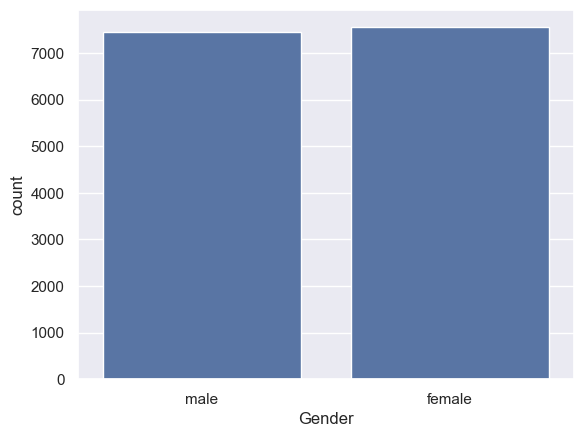

In [10]:
sns.countplot(data, x= 'Gender')

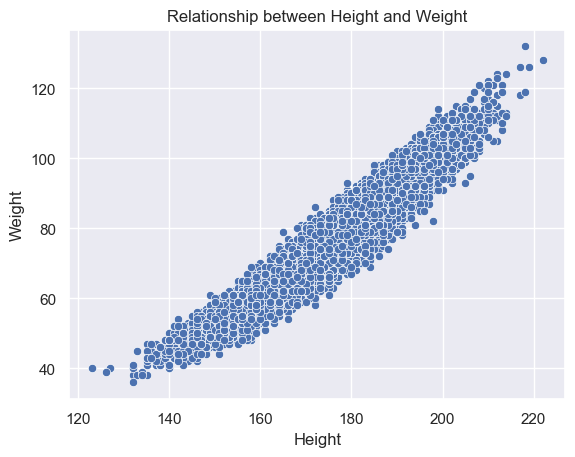

In [19]:
sns.scatterplot(x='Height', y='Weight', data=data)
plt.title('Relationship between Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

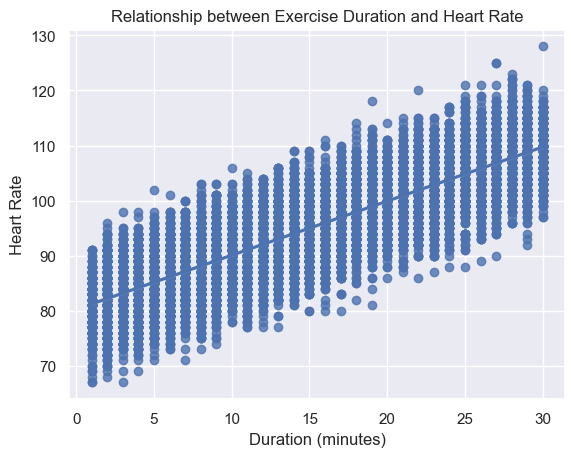

In [22]:
sns.regplot(x='Duration', y='Heart_Rate', data=data)
plt.title('Relationship between Exercise Duration and Heart Rate')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate')
plt.show()


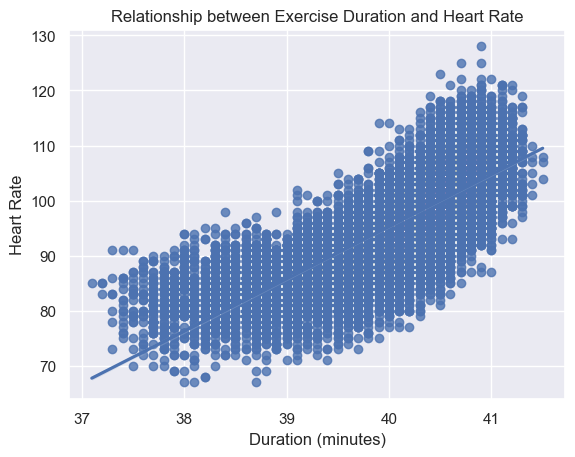

In [26]:
sns.regplot(x='Body_Temp', y='Heart_Rate', data=data)
plt.title('Relationship between Exercise Duration and Heart Rate')
plt.xlabel('Duration (minutes)')
plt.ylabel('Heart Rate')
plt.show()

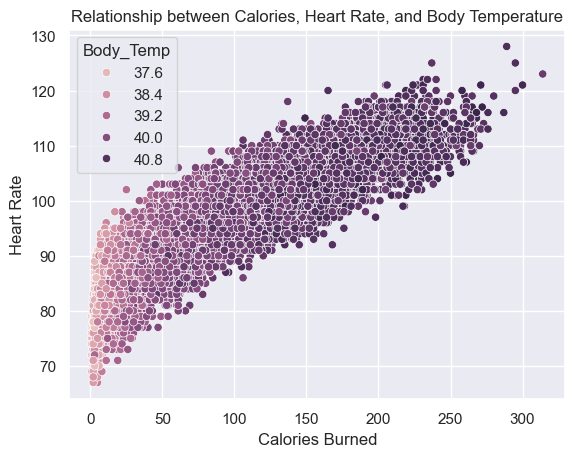

In [28]:
sns.scatterplot(x='Calories', y='Heart_Rate', hue='Body_Temp', data=data)
plt.title('Relationship between Calories, Heart Rate, and Body Temperature')
plt.xlabel('Calories Burned')
plt.ylabel('Heart Rate')
plt.show()

### Model Building with Pipelines

In [467]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [505]:
class PredictPipeline:
    def __init__(self):
        self.pipeline = None
        self.model = RandomForestRegressor()

    def preprocess(self, data):
        num_cols = data.select_dtypes(['float64', 'int64']).columns
        cat_cols = data.columns.difference(num_cols)
        self.pipeline = Pipeline([('preprocessor', ColumnTransformer(
            transformers=[('num', StandardScaler(), num_cols),
                          ('cat', OneHotEncoder(), cat_cols)],
            remainder= 'passthrough'
           )
        )])
        
        return self.pipeline.fit_transform(data)

    def Train_Model(self, X, y):
        preprocessed_X = self.preprocess(X)
        X_train, X_test, y_train, y_test = train_test_split(preprocessed_X, y, test_size=0.25, random_state=89)
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        return mse, mae

    def predict(self, instance):
        instance_df = pd.DataFrame(instance).T
        instance_transformed = self.pipeline.transform(instance_df)
        return self.model.predict(instance_transformed)
        

In [364]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4
14996,female,27,165.0,65.0,6.0,85.0,39.2
14997,female,43,159.0,58.0,16.0,90.0,40.1
14998,male,78,193.0,97.0,2.0,84.0,38.3


In [471]:
X = exercise_data.drop('User_ID', axis=1)
y = calories_data['Calories']

In [411]:
X.shape

(15000, 7)

In [506]:
pipeline = PredictPipeline()

In [478]:
preprocesed_X = pipeline.preprocess(X)

In [508]:
pipeline.Train_Model(X,y)

(7.627657306666668, 1.7625840000000002)

In [512]:
pipeline.predict(instance = X.iloc[67,:])

array([45.33])

In [514]:
import pickle as pkl
with open('model.pkl','wb') as file:
    pkl.dump(model, file) 